## <font size=5> <strong>THYROID PREDICTION
 

## I. Importing essential libraries

In [1]:
## Import different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.utils import resample


import warnings
warnings.filterwarnings('ignore')

## II. Importing and understanding our dataset 

In [2]:
## Reading the data
data = pd.read_csv('thyroid_data.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
data.shape

(3221, 28)

#### Printing out a few columns

In [5]:
data.head(5)

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41,F,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,1,23,F,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,negative
2,2,46,M,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,negative
3,3,70,F,t,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,negative
4,4,70,F,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative


In [6]:
data.sample(5)

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
2359,2391,59,F,f,f,f,f,f,f,f,...,0.1,t,2.5,t,100,t,0.98,t,103,negative
1647,1664,41,F,t,f,f,f,f,f,f,...,1.8,t,2.4,t,115,t,1.11,t,104,negative
1833,1854,23,F,f,f,f,f,f,f,f,...,2.4,t,1.3,t,72,t,0.9,t,80,negative
871,878,14,F,f,f,f,f,f,f,f,...,3.6,t,1.2,t,103,t,0.88,t,118,negative
2572,2609,47,M,t,f,f,f,f,f,f,...,2.7,t,2,t,110,t,1.02,t,108,negative


#### Description

In [7]:
data.describe()

,S.no
count,3221.000000
mean,1387.205837
std,808.069932
min,0.000000
25%,679.000000
50%,1388.000000
75%,2080.000000
max,2799.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.no                       3221 non-null   int64 
 1   Age                        3221 non-null   object
 2   Sex                        3221 non-null   object
 3   On Thyroxine               3221 non-null   object
 4   Query on Thyroxine         3221 non-null   object
 5   On Antithyroid Medication  3221 non-null   object
 6   Sick                       3221 non-null   object
 7   Pregnant                   3221 non-null   object
 8   Thyroid Surgery            3221 non-null   object
 9   I131 Treatment             3221 non-null   object
 10  Query Hypothyroid          3221 non-null   object
 11  Query Hyperthyroid         3221 non-null   object
 12  Lithium                    3221 non-null   object
 13  Goitre                     3221 non-null   object
 14  Tumor   

#### columns:

In [9]:
data.columns

Index(['S.no', 'Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH',
       'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U',
       'FTI Measured', 'FTI', 'Category'],
      dtype='object')

In [10]:
n = len(data[data['Category'] == 'hyperthyroid'])
print("No of hyperthyroid in Dataset:",n)

n1 = len(data[data['Category'] == 'hypothyroid'])
print("No of hypothyroid in Dataset:",n1)

n2 = len(data[data['Category'] == 'sick'])
print("No of sick in Dataset:",n2)

n3 = len(data[data['Category'] == 'negative'])
print("No of negative in Dataset:",n3)

No of hyperthyroid in Dataset: 77
No of hypothyroid in Dataset: 220
No of sick in Dataset: 171
No of negative in Dataset: 2753


In [11]:
data['Category'].value_counts()

negative        2753
hypothyroid      220
sick             171
hyperthyroid      77
Name: Category, dtype: int64

#### Analysing the 'target' variable

In [12]:
data["Category"].describe()

count         3221
unique           4
top       negative
freq          2753
Name: Category, dtype: object

In [13]:
data["Category"].unique()

array(['negative', 'hyperthyroid', 'hypothyroid', 'sick'], dtype=object)

In [14]:
## Checking the missing values
data.isnull().sum()

S.no                         0
Age                          0
Sex                          0
On Thyroxine                 0
Query on Thyroxine           0
On Antithyroid Medication    0
Sick                         0
Pregnant                     0
Thyroid Surgery              0
I131 Treatment               0
Query Hypothyroid            0
Query Hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH Measured                 0
TSH                          0
T3 Measured                  0
T3                           0
TT4 Measured                 0
TT4                          0
T4U Measured                 0
T4U                          0
FTI Measured                 0
FTI                          0
Category                     0
dtype: int64

In [15]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count != 0:
        print(column,data[column][data[column]=='?'].count())

Age 1
Sex 127
TSH 247
T3 589
TT4 142
T4U 276
FTI 274


In [16]:
## Let's drop some unnecessary columns
data=data.drop([ 'S.no','On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
        'TSH Measured','Hypopituitary','Psych',
       'T3 Measured',  'TT4 Measured', 'T4U Measured', 
       'FTI Measured'],axis=1)

In [17]:
data.columns

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category'],
      dtype='object')

In [18]:
## Now replace the '?' values with numpy nan
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

In [19]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

Age 0
Sex 0
Sick 0
Pregnant 0
Thyroid Surgery 0
Goitre 0
Tumor 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Category 0


In [20]:
##  Unique Values
for column in data.columns:
    print(column,(data[column].unique()))

Age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
Sex ['F' 'M' nan]
Sick ['f' 't']
Pregnant ['f' 't']
Thyroid Surgery ['f' 't']
Goitre ['f' 't']
Tumor ['f' 't']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '1.7' '7.3' '1.8' '0.26' '45' '5.4' '0.99' '0.25'
 '0.92' '0.15' '0.64' '1' '0.4' '2' '2.6' '14.8' '15' '19' '0.02' '3'
 '2.9' '3.2' '9' '1.6' '4.3' '0.005' '0.31' '0.61' '0.05' '7.8' '160'
 '0.025' '1.4' '0.01' '8.8' '151' '0.04' '3.9' '9

In [21]:
data.dtypes

Age                object
Sex                object
Sick               object
Pregnant           object
Thyroid Surgery    object
Goitre             object
Tumor              object
TSH                object
T3                 object
TT4                object
T4U                object
FTI                object
Category           object
dtype: object

## Handling Missing

In [22]:
data['Age'].fillna((data['Age'].median()), inplace = True)
data['TSH'].fillna((data['TSH'].median()), inplace = True)
data['T3'].fillna((data['T3'].median()), inplace = True)
data['TT4'].fillna((data['TT4'].median()), inplace = True)
data['T4U'].fillna((data['T4U'].median()), inplace = True)
data['FTI'].fillna((data['FTI'].median()), inplace = True)

### Handling nominal categorical variables

In [23]:
## We will perform one hot encoding for nominal categorical variable.
sex = data[["Sex"]]
sex = pd.get_dummies(sex, drop_first= True)

In [24]:
sick = data[["Sick"]]
sick = pd.get_dummies(sick, drop_first= True)

In [25]:
pregnant = data[["Pregnant"]]
pregnant = pd.get_dummies(pregnant, drop_first= True)

In [26]:
thyroid_surgery = data[["Thyroid Surgery"]]
thyroid_surgery = pd.get_dummies(thyroid_surgery, drop_first= True)

In [27]:
goitre = data[["Goitre"]]
goitre = pd.get_dummies(goitre, drop_first= True)

In [28]:
tumor = data[["Tumor"]]
tumor = pd.get_dummies(tumor, drop_first= True)

In [29]:
data.columns

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category'],
      dtype='object')

In [30]:
final_df = pd.concat([data,sex, sick, pregnant, thyroid_surgery,
       goitre, tumor,], axis = 1)

In [31]:
final_df.columns

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category', 'Sex_M', 'Sick_t',
       'Pregnant_t', 'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t'],
      dtype='object')

In [32]:
final_df.drop(['Sex', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'Goitre', 'Tumor'], axis = 1, inplace = True)

In [33]:
## Checking the missing values
final_df.isnull().sum()

Age                  0
TSH                  0
T3                   0
TT4                  0
T4U                  0
FTI                  0
Category             0
Sex_M                0
Sick_t               0
Pregnant_t           0
Thyroid Surgery_t    0
Goitre_t             0
Tumor_t              0
dtype: int64

## iii Exploratory Data Analysis (EDA)

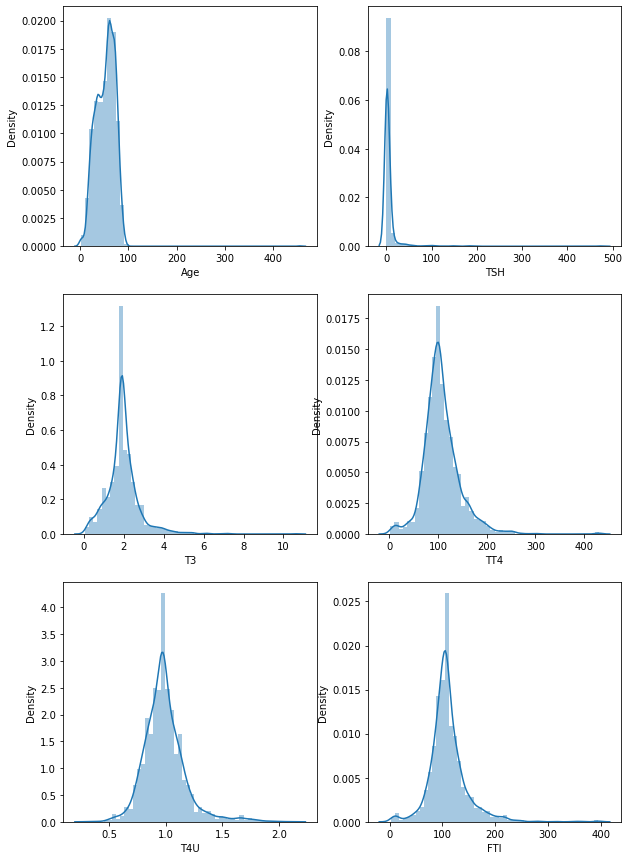

In [34]:
## Let's check the distribution for our continuous data in the dataset.
columns = ['Age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(final_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
final_df['Category']=lblEn.fit_transform(final_df['Category'])

<AxesSubplot:xlabel='Category', ylabel='count'>

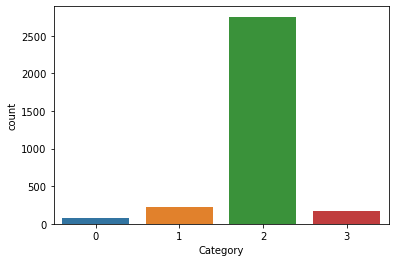

In [36]:
sns.countplot(final_df['Category'])

In [37]:
final_df.dtypes

Age                  object
TSH                  object
T3                   object
TT4                  object
T4U                  object
FTI                  object
Category              int32
Sex_M                 uint8
Sick_t                uint8
Pregnant_t            uint8
Thyroid Surgery_t     uint8
Goitre_t              uint8
Tumor_t               uint8
dtype: object

In [38]:
final_df['Age'] = final_df["Age"].astype(int)
final_df['TSH'] = final_df["TSH"].astype(float)
final_df['T3'] = final_df["T3"].astype(float)
final_df['TT4'] = final_df["TT4"].astype(float)
final_df['T4U'] = final_df["T4U"].astype(float)
final_df['FTI'] = final_df["FTI"].astype(float)



In [39]:
l=["Sex_M","Sick_t","Pregnant_t","Thyroid Surgery_t","Goitre_t","Tumor_t"]
for i in l:
    final_df['FTI'] = final_df["FTI"].astype(int)
    

In [40]:
final_df.dtypes


Age                    int32
TSH                  float64
T3                   float64
TT4                  float64
T4U                  float64
FTI                    int32
Category               int32
Sex_M                  uint8
Sick_t                 uint8
Pregnant_t             uint8
Thyroid Surgery_t      uint8
Goitre_t               uint8
Tumor_t                uint8
dtype: object

## IV. Train Test split

In [41]:
X=final_df.drop(['Category'],axis=1)
Y=final_df.Category

In [42]:
! pip install imbalanced-learn


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Index(['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Sex_M', 'Sick_t',
       'Pregnant_t', 'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t'],
      dtype='object')

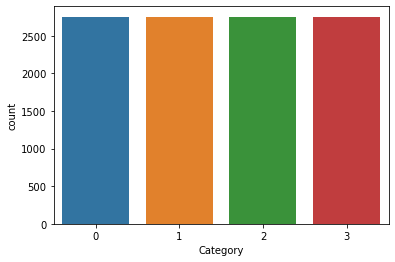

In [43]:
# 42 input

from imblearn.over_sampling import SMOTE



rdsmple=SMOTE()
X_sampled,y_sampled=rdsmple.fit_resample(X,Y)

X_sampled.shape


X_sampled=pd.DataFrame(data=X_sampled,columns=X.columns)


X_sampled


sns.countplot(y_sampled)


X_sampled.columns


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sampled,y_sampled,test_size=0.2,random_state=0)

In [45]:
X_train.shape

(8809, 12)

In [46]:
X_test.shape

(2203, 12)

In [47]:
y_train.shape

(8809,)

In [48]:
y_test.shape

(2203,)

## V. Model Fitting

### K Nearest Neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

In [50]:
Y_pred_knn.shape

(2203,)

In [51]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 84.84 %


Confusion Matrix is:
 [[542   0  11  10]
 [  1 539   0  13]
 [ 45  56 320 111]
 [ 50  25  12 468]]


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


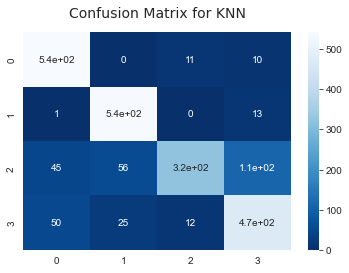

In [52]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, Y_pred_knn) 
print("Confusion Matrix is:\n",cm)

sns.set_style("dark")

sns.heatmap(cm, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for KNN", fontsize=14, fontname="Helvetica", y=1.04);


### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier



dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

In [54]:
print(Y_pred_dt.shape)

(2203,)


In [55]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 86.25 %


Confusion Matrix is:
 [[516   0  20  27]
 [  0 501  41  11]
 [ 23  45 430  34]
 [ 28  25  49 453]]


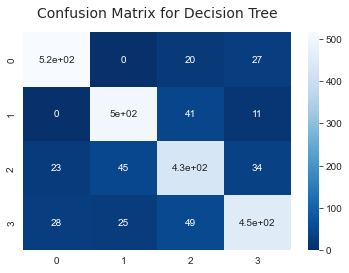

In [56]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, Y_pred_dt) 
print("Confusion Matrix is:\n",cm)

sns.set_style("dark")

sns.heatmap(cm, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Decision Tree", fontsize=14, fontname="Helvetica", y=1.04);


### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [58]:
Y_pred_rf.shape

(2203,)

Confusion Matrix is:
 [[528   0  10  25]
 [  0 509  37   7]
 [ 21  43 425  43]
 [ 32  19  23 481]]


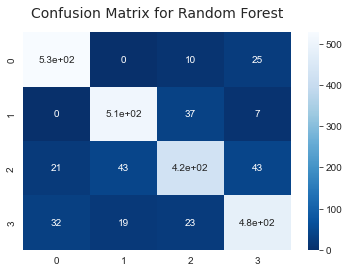

In [59]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, Y_pred_rf) 
print("Confusion Matrix is:\n",cm)

sns.set_style("dark")

sns.heatmap(cm, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest", fontsize=14, fontname="Helvetica", y=1.04);


In [60]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.2 %


In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster='gbtree', max_depth=4)
xgb.fit(X_train,y_train)

[09:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [62]:
score_xgb=xgb.score(X_train, y_train)*100
print('XGB Accuracy:', xgb.score(X_train, y_train)*100)

XGB Accuracy: 95.45918946531955


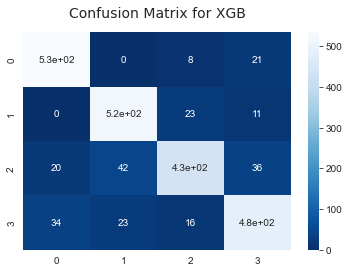

In [63]:
# Confusion Matrix of XGB

y_pred_xgb= xgb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for XGB", fontsize=14, fontname="Helvetica", y=1.04);

## VI. Output final score

In [64]:
scores = [score_knn,score_dt,score_rf,score_xgb]
algo = ["K-Nearest Neighbors","Decision Tree","Random Forest","XGBOOST"]    

for i in range(len(algo)):
    print("The accuracy score for "+algo[i]+" is: "+str(scores[i])+" %")

The accuracy score for K-Nearest Neighbors is: 84.84 %
The accuracy score for Decision Tree is: 86.25 %
The accuracy score for Random Forest is: 88.2 %
The accuracy score for XGBOOST is: 95.45918946531955 %


<AxesSubplot:title={'center':'Comparsion of algorithms'}, xlabel='<------  Algorithms  ------>', ylabel='<------  Accuracy score  ------>'>

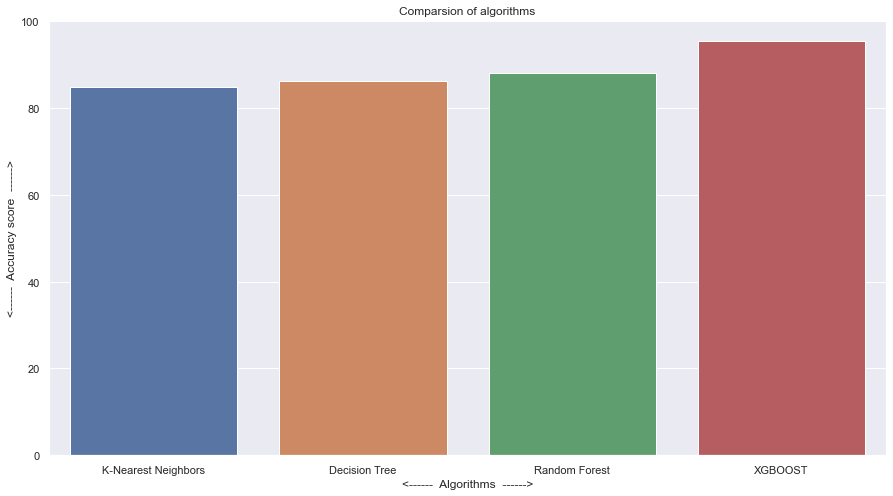

In [65]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("<------  Algorithms  ------>")
plt.ylabel("<------  Accuracy score  ------>")
plt.title("Comparsion of algorithms")

sns.barplot(algo,scores)

### classification report for each algorithm 

In [ ]:
l=[Y_pred_knn,Y_pred_dt,Y_pred_rf,y_pred_xgb]
for i in range(len(algo)):
    print("-------------------------------------------------------")
    print(algo[i])
    print("-------------------------------------------------------")
    print("Classification Report is:\n\n",classification_report(y_test,l[i]))

    

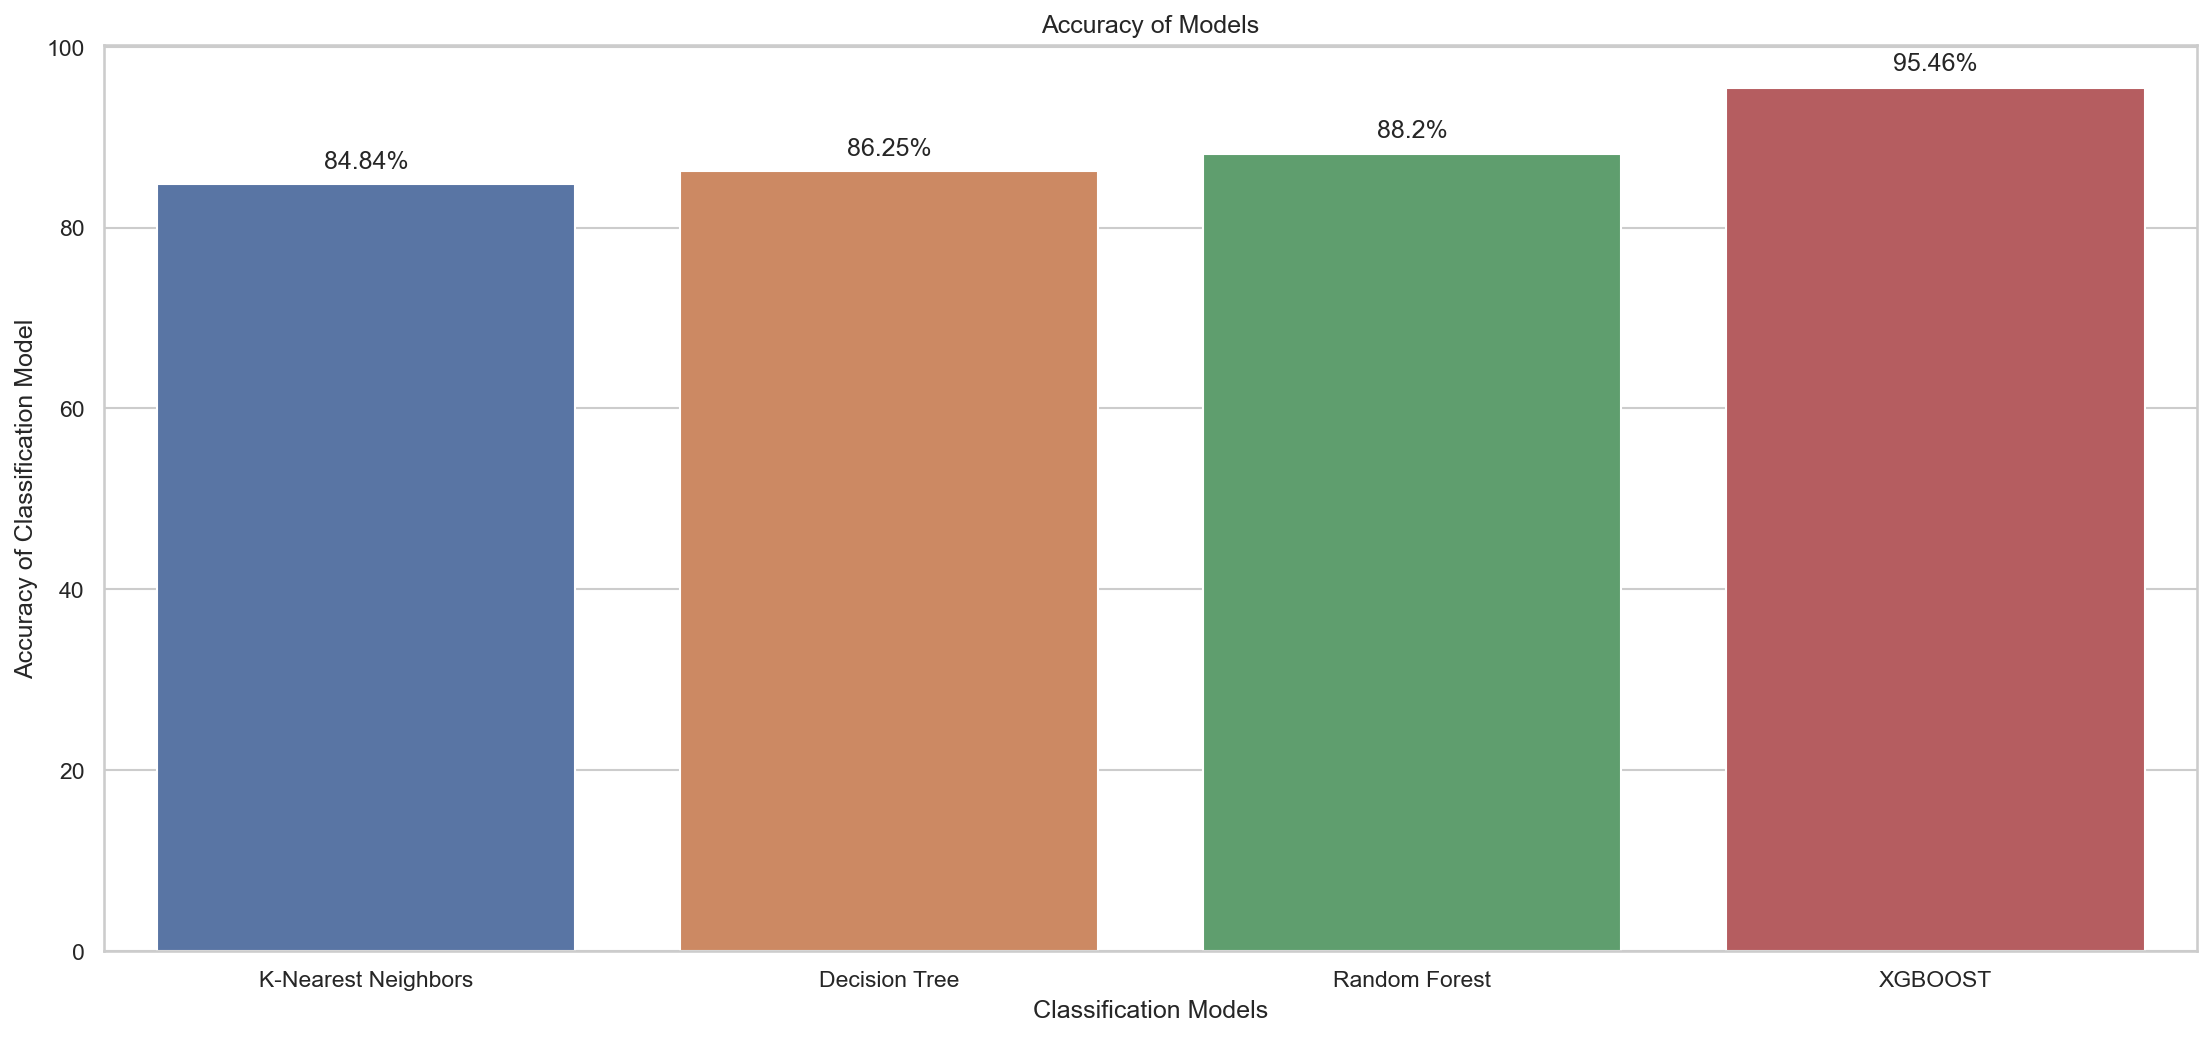

In [67]:
sns.set_style("whitegrid")
sns.color_palette("Paired")
plt.figure(figsize=(18,8), dpi=150)
ax = sns.barplot(x=algo, y=scores)
plt.title("Accuracy of Models")
plt.xlabel('Classification Models')
plt.ylabel("Accuracy of Classification Model")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')
plt.show()